In [9]:
source("http://bioconductor.org/biocLite.R")
biocLite("goseq")
biocLite("edgeR")
biocLite("org.Hs.eg.db")

Bioconductor version 3.2 (BiocInstaller 1.20.3), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.2 (BiocInstaller 1.20.3), R 3.2.3 (2015-12-10).
Installing package(s) 'goseq'


package 'goseq' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ali\AppData\Local\Temp\RtmpoF3iLN\downloaded_packages


Old packages: 'acepack', 'apcluster', 'ape', 'colorspace', 'crayon', 'curl',
  'DBI', 'devtools', 'doParallel', 'evaluate', 'Formula', 'futile.logger',
  'ggplot2', 'git2r', 'gridExtra', 'Hmisc', 'htmltools', 'htmlwidgets', 'httr',
  'igraph', 'irlba', 'jsonlite', 'lambda.r', 'memoise', 'NLP', 'openssl',
  'pbdZMQ', 'plyr', 'R6', 'Rcpp', 'RcppArmadillo', 'reshape2', 'rJava',
  'RSQLite', 'rstudioapi', 'scales', 'snow', 'statmod', 'statnet.common',
  'stringi', 'stringr', 'visNetwork', 'withr', 'wordnet', 'XML', 'boot',
  'cluster', 'codetools', 'foreign', 'lattice', 'MASS', 'Matrix', 'mgcv',
  'nlme', 'nnet', 'rpart', 'survival'
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.2 (BiocInstaller 1.20.3), R 3.2.3 (2015-12-10).
Installing package(s) 'edgeR'
also installing the dependency 'limma'



package 'limma' successfully unpacked and MD5 sums checked
package 'edgeR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ali\AppData\Local\Temp\RtmpoF3iLN\downloaded_packages


Old packages: 'acepack', 'apcluster', 'ape', 'colorspace', 'crayon', 'curl',
  'DBI', 'devtools', 'doParallel', 'evaluate', 'Formula', 'futile.logger',
  'ggplot2', 'git2r', 'gridExtra', 'Hmisc', 'htmltools', 'htmlwidgets', 'httr',
  'igraph', 'irlba', 'jsonlite', 'lambda.r', 'memoise', 'NLP', 'openssl',
  'pbdZMQ', 'plyr', 'R6', 'Rcpp', 'RcppArmadillo', 'reshape2', 'rJava',
  'RSQLite', 'rstudioapi', 'scales', 'snow', 'statmod', 'statnet.common',
  'stringi', 'stringr', 'visNetwork', 'withr', 'wordnet', 'XML', 'boot',
  'cluster', 'codetools', 'foreign', 'lattice', 'MASS', 'Matrix', 'mgcv',
  'nlme', 'nnet', 'rpart', 'survival'


In [ ]:
setwd('~/bme/jupyter_data/')
library(goseq)

First I look for any enriched GO terms in genes that have intron retention events. Genes are determined to have IR events according to mark_intron_retention.py, which compares all consensus isoforms for a gene and checks if any isoform has an exon that nearly completely spans another isoforms' intron. Next I look for enriched GO terms in genes that have intron retention events and are more highly expressed in the wildtype.

ENSG00000102054 ENSG00000124208 ENSG00000269899 ENSG00000167699 ENSG00000274888 
              0               0               0               0               0 
ENSG00000106554 
              0

Loading hg19 length data...
Fetching GO annotations...
For 1304 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


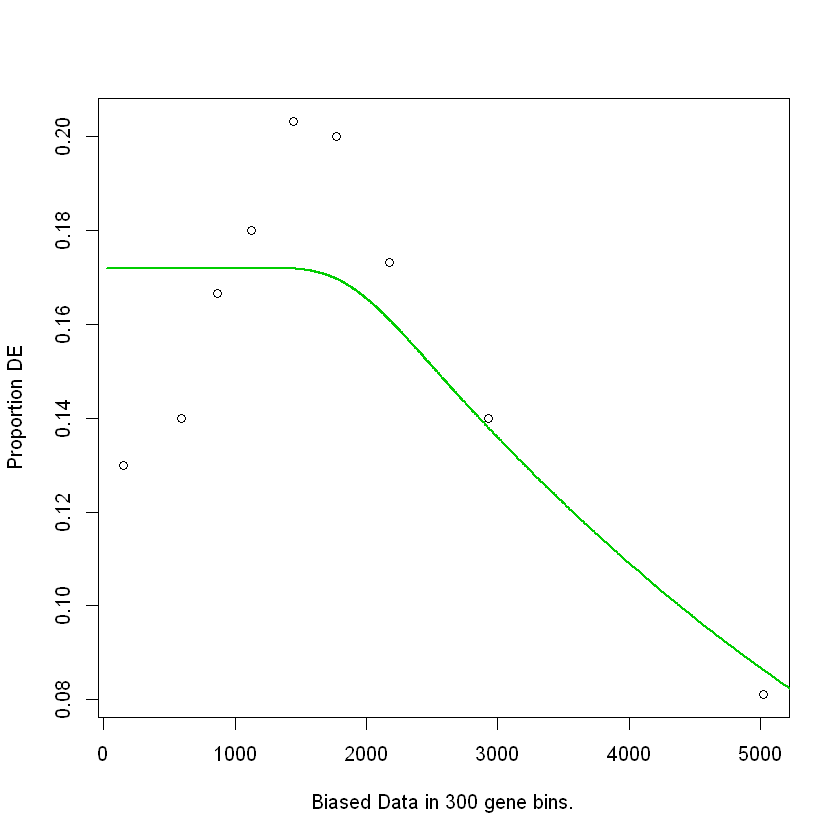

In [22]:
info = read.table('ir_goseq_bool.txt')  # intron retetion calls present/absent per gene
genes = info$V2
names(genes) = info$V1
head(genes)

pwf = nullp(genes, 'hg19', 'ensGene')  # it has to fetch gene lengths to fit the probability weighting function
res = goseq(pwf, 'hg19', 'ensGene', method='Hypergeometric')   # no length bias of long reads for genes

In [26]:
res[1:30,]

,category,over_represented_pvalue,under_represented_pvalue,numDEInCat,numInCat,term,ontology
1693,GO:0006405,9.426504e-05,0.9999832,13,26,RNA export from nucleus,BP
7982,GO:0051592,1.983706e-04,0.9999770,9,15,response to calcium ion,BP
8922,GO:0071166,4.573343e-04,0.9999057,12,26,ribonucleoprotein complex localization,BP
9016,GO:0071426,4.573343e-04,0.9999057,12,26,ribonucleoprotein complex export from nucleus,BP
1694,GO:0006406,5.446785e-04,0.9998956,11,23,mRNA export from nucleus,BP
9017,GO:0071427,5.446785e-04,0.9998956,11,23,mRNA-containing ribonucleoprotein complex export from nucleus,BP
3168,GO:0015931,6.502184e-04,0.9998347,14,34,nucleobase-containing compound transport,BP
7750,GO:0051028,6.997288e-04,0.9998457,12,27,mRNA transport,BP
7562,GO:0050657,8.256980e-04,0.9997974,13,31,nucleic acid transport,BP
7563,GO:0050658,8.256980e-04,0.9997974,13,31,RNA transport,BP


ENSG00000172349 ENSG00000261471 ENSG00000279641 ENSG00000252549 ENSG00000131051 
              1               0               1               1               1 
ENSG00000164548 
              1

Loading hg19 length data...
Fetching GO annotations...
For 125 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


,category,over_represented_pvalue,under_represented_pvalue,numDEInCat,numInCat,term,ontology
2028,GO:0032482,0.04196669,1.0000000,4,4,Rab protein signal transduction,BP
1738,GO:0030139,0.05041309,0.9910881,7,9,endocytic vesicle,CC
855,GO:0006979,0.07083739,0.9916662,5,6,response to oxidative stress,BP
2219,GO:0034341,0.07083739,0.9916662,5,6,response to interferon-gamma,BP
2837,GO:0045335,0.07083739,0.9916662,5,6,phagocytic vesicle,CC
3484,GO:0060333,0.07083739,0.9916662,5,6,interferon-gamma-mediated signaling pathway,BP


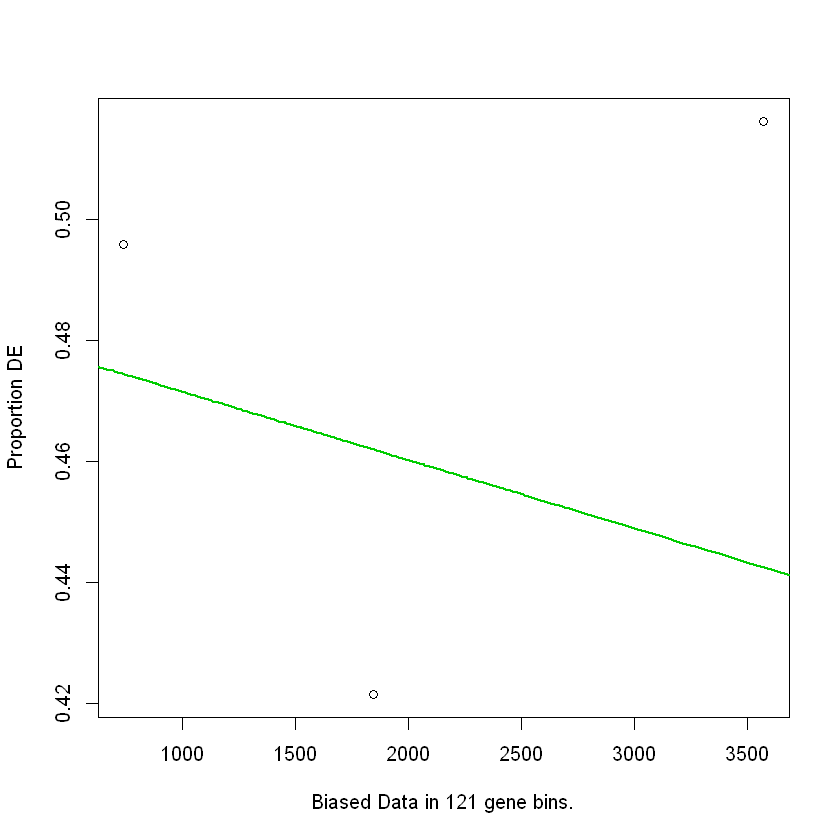

In [27]:
info = read.table('ir_goseq_wt.txt')  # for intron retention events that are/are not more highly expressed in the wt

genes = info$V2
names(genes) = info$V1
head(genes)

pwf = nullp(genes, 'hg19', 'ensGene')
res_wt = goseq(pwf, 'hg19', 'ensGene', method='Hypergeometric')

head(res_wt)

ENSG00000172349 ENSG00000261471 ENSG00000279641 ENSG00000252549 ENSG00000131051 
              1               0               1               1               1 
ENSG00000164548 
              1

Loading hg19 length data...
Warning message in pcls(G):
"initial point very close to some inequality constraints"Fetching GO annotations...
For 125 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


,category,over_represented_pvalue,under_represented_pvalue,numDEInCat,numInCat,term,ontology
960,GO:0007599,0.0005262045,1.0000000,12,12,hemostasis,BP
959,GO:0007596,0.0010081901,1.0000000,11,11,blood coagulation,BP
3177,GO:0050817,0.0010081901,1.0000000,11,11,coagulation,BP
1137,GO:0009611,0.0011020257,0.9999270,14,15,response to wounding,BP
4129,GO:1903047,0.0018154237,0.9997191,18,21,mitotic cell cycle process,BP
1912,GO:0031401,0.0031873412,0.9993766,19,23,positive regulation of protein modification process,BP


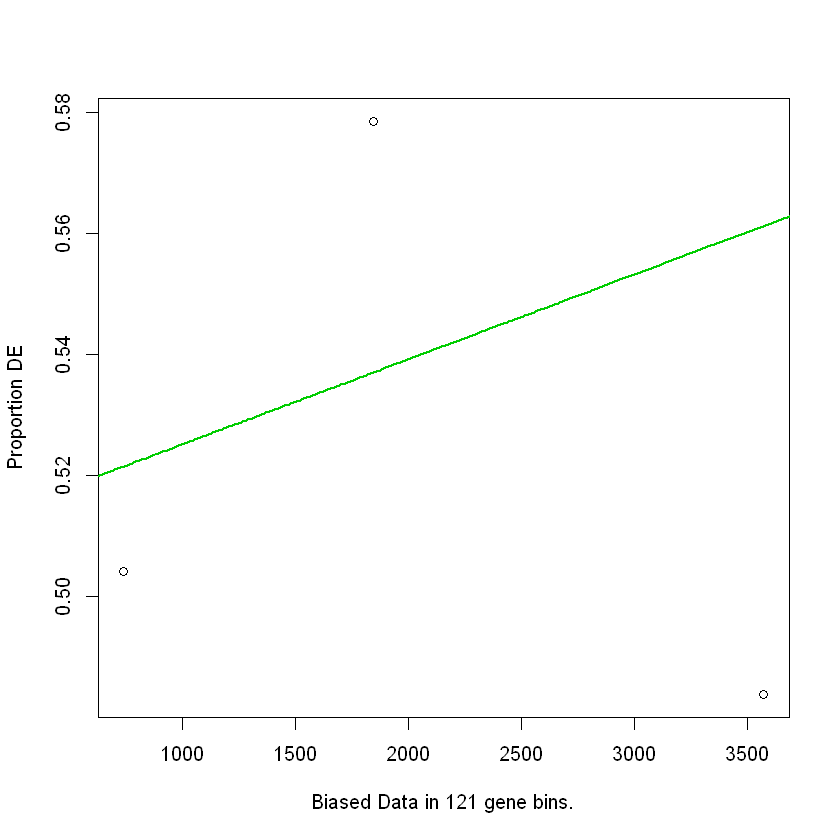

In [28]:
info = read.table('ir_goseq_wt.txt')  # for intron retention events that are/are not more highly expressed in the wt

genes = info$V2
names(genes) = info$V1
genes[genes==0] = 2
genes[genes==1] = 0
genes[genes==2] = 1  # for intron retention events that are/are not more highly expressed in the mt
head(genes)

pwf = nullp(genes, 'hg19', 'ensGene')  # it has to fetch gene lengths to fit the probability weighting function
res_mt = goseq(pwf, 'hg19', 'ensGene', method='Hypergeometric')   # no length bias of long reads for genes

head(res_mt)

In [29]:
tail(res)
tail(res_wt)
tail(res_mt)

,category,over_represented_pvalue,under_represented_pvalue,numDEInCat,numInCat,term,ontology
10702,GO:2001240,1,0.8308858,0,1,negative regulation of extrinsic apoptotic signaling pathway in absence of ligand,BP
10711,GO:2001258,1,0.5734537,0,3,negative regulation of cation channel activity,BP
10712,GO:2001259,1,0.5734537,0,3,positive regulation of cation channel activity,BP
10714,GO:2001268,1,0.5734537,0,3,negative regulation of cysteine-type endopeptidase activity involved in apoptotic signaling pathway,BP
10718,GO:2001279,1,0.8308858,0,1,regulation of unsaturated fatty acid biosynthetic process,BP
10719,GO:2001280,1,0.8308858,0,1,positive regulation of unsaturated fatty acid biosynthetic process,BP


,category,over_represented_pvalue,under_represented_pvalue,numDEInCat,numInCat,term,ontology
4315,GO:2001241,1,0.5439331,0,1,positive regulation of extrinsic apoptotic signaling pathway in absence of ligand,BP
4318,GO:2001244,1,0.2948209,0,2,positive regulation of intrinsic apoptotic signaling pathway,BP
4319,GO:2001251,1,0.5439331,0,1,negative regulation of chromosome organization,BP
4321,GO:2001256,1,0.5439331,0,1,regulation of store-operated calcium entry,BP
4323,GO:2001267,1,0.5439331,0,1,regulation of cysteine-type endopeptidase activity involved in apoptotic signaling pathway,BP
4324,GO:2001269,1,0.5439331,0,1,positive regulation of cysteine-type endopeptidase activity involved in apoptotic signaling pathway,BP


,category,over_represented_pvalue,under_represented_pvalue,numDEInCat,numInCat,term,ontology
4306,GO:2001166,1,0.4560669,0,1,regulation of histone H2B ubiquitination,BP
4307,GO:2001168,1,0.4560669,0,1,positive regulation of histone H2B ubiquitination,BP
4308,GO:2001198,1,0.4560669,0,1,regulation of dendritic cell differentiation,BP
4317,GO:2001243,1,0.4560669,0,1,negative regulation of intrinsic apoptotic signaling pathway,BP
4325,GO:2001273,1,0.4560669,0,1,regulation of glucose import in response to insulin stimulus,BP
4326,GO:2001274,1,0.4560669,0,1,negative regulation of glucose import in response to insulin stimulus,BP
